# Fourier series and y Gibbs'  phenomenon
The Fourie seres of a $2\pi-$periodic function $f$ is given by
$$
f(x) \sim  \frac{a_0}{2} + \sum_{n = 1}^{\infty} a_n\, \cos{ n\,x} + 
b_n\, \sin{n\,x}
$$
where the Fourier coefficients $a_n$ and $b_n$ are given by
$$
a_n = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\,  \cos{ n\,x}\, dx, \quad
b_n = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\,  \sin{ n\,x}\, dx, \quad
$$
See for example [P. Olver](http://www-users.math.umn.edu/~olver/pde.html) Chapter 3, Section 3.2:  *Fourier Series* 

*Warning:* The purpose of this notebook is to exemplify the Fourier Approximation of a function only. The procedures we use here are far from being numerically efficient. For a real word application it is best to use implementation of FFT algorithm. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sympy import fourier_series, pi 
from sympy.abc import x 
from sympy import exp
from sympy.functions import sign

In [3]:
fs_x = fourier_series(x, (x, -pi, pi))
fs_sign = fourier_series(sign(x), (x, -pi, pi))
# We truncate the Fourier series at N
nn = 9
truncate_fs_x = fs_x.truncate(nn)
truncate_fs_sign = fs_sign.truncate(nn)
truncate_fs_x

2*sin(x) - sin(2*x) + 2*sin(3*x)/3 - sin(4*x)/2 + 2*sin(5*x)/5 - sin(6*x)/3 + 2*sin(7*x)/7 - sin(8*x)/4 + 2*sin(9*x)/9

In [4]:
''' Since truncate_fs_x and truncate_fs_sign were obtained using 
sympy, they are suitable for symbolic calculations only. They need 
to be modified to perform numeric computations'''

from sympy import lambdify
eval_tfs_x = lambdify(x, truncate_fs_x, modules=['numpy'])
eval_tfs_sign = lambdify(x, truncate_fs_sign, modules=['numpy'])

In [5]:
'''
Here is the trick to get the 2pi periodic extension of any function 
defined on [-pi, pi]: windig the real numbers along the unitary circle of 
''' 
real = np.linspace(-4*np.pi, 4*np.pi, 500)
wnd = real- 2*np.pi*np.floor((real+np.pi)/(2*np.pi))  

The Fourier approximation of the 2$\pi$-periodic extension of $f(x)= x$

In [6]:
fs_x = eval_tfs_x(real) 
fs_sign = eval_tfs_sign(real)

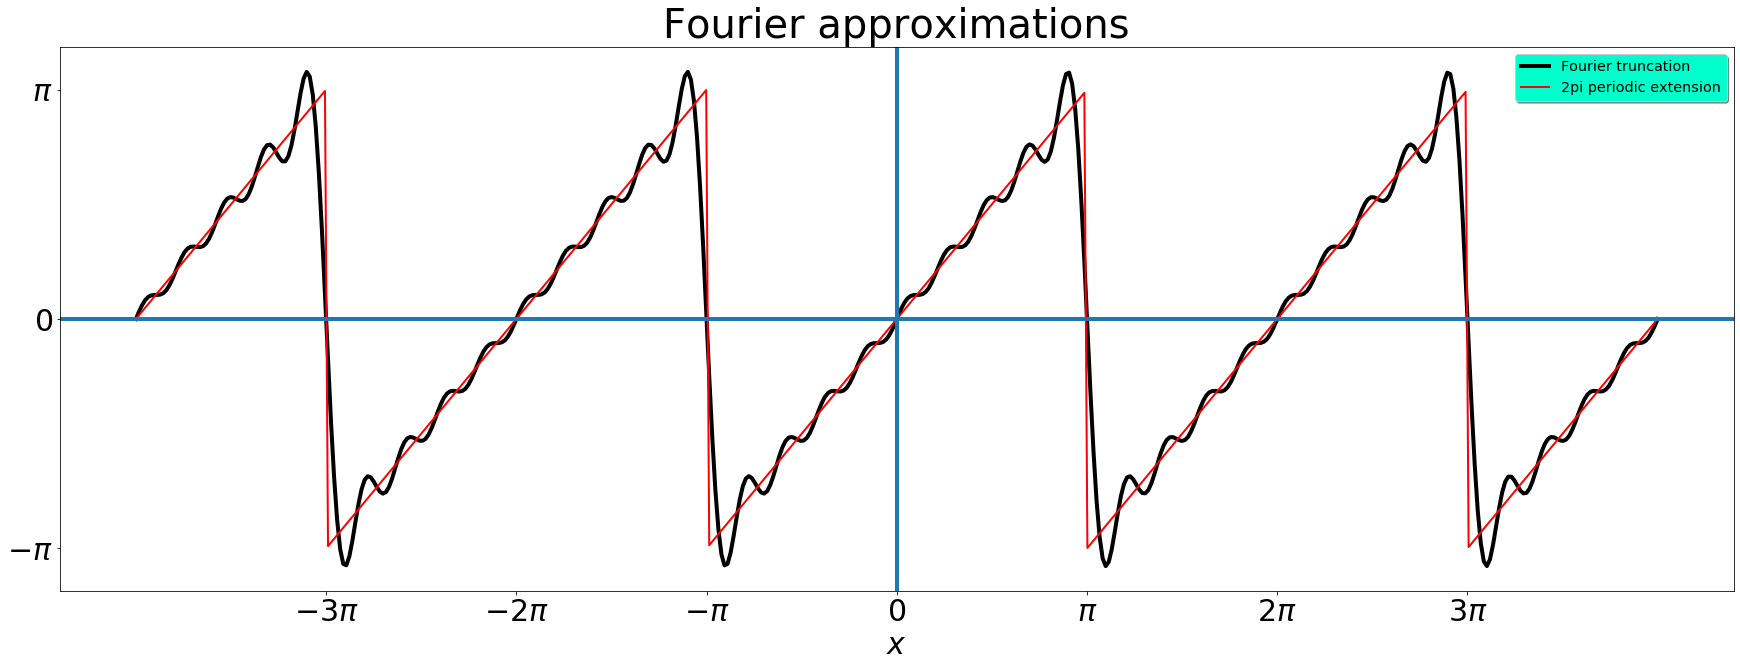

In [7]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(real,fs_x, lw = 4, color="black", label='Fourier truncation')
ax.plot(real,wnd, lw = 2, color="red", label='2pi periodic extension') 
ax.axhline(y =0, xmin = -4*pi, xmax= 4*pi, lw = 4)
ax.axvline(x =0, ymin = -pi, ymax= pi, lw = 4)
plt.xticks([-3*pi,-2*pi, -pi, 0,pi , 2*pi, 3*pi],
           [r'$-3\pi$',r'$-2\pi$',r'$-\pi$',r'$0$', r'$\pi$',r'$2\pi$',r'$3\pi$' ],fontsize=30)
plt.yticks([-pi, 0,pi],
           [r'$-\pi$',r'$0$', r'$\pi$'  ],fontsize=30)
plt.xlabel(r'$x$', fontsize=30)
#plt.ylabel(r'x')
plt.title(r'Fourier approximations',fontsize=40)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.show()

The Fourier approximation of the 2$\pi$-periodic extension of $f(x)= sign(x)$

In [8]:
sign = np.sign(wnd)

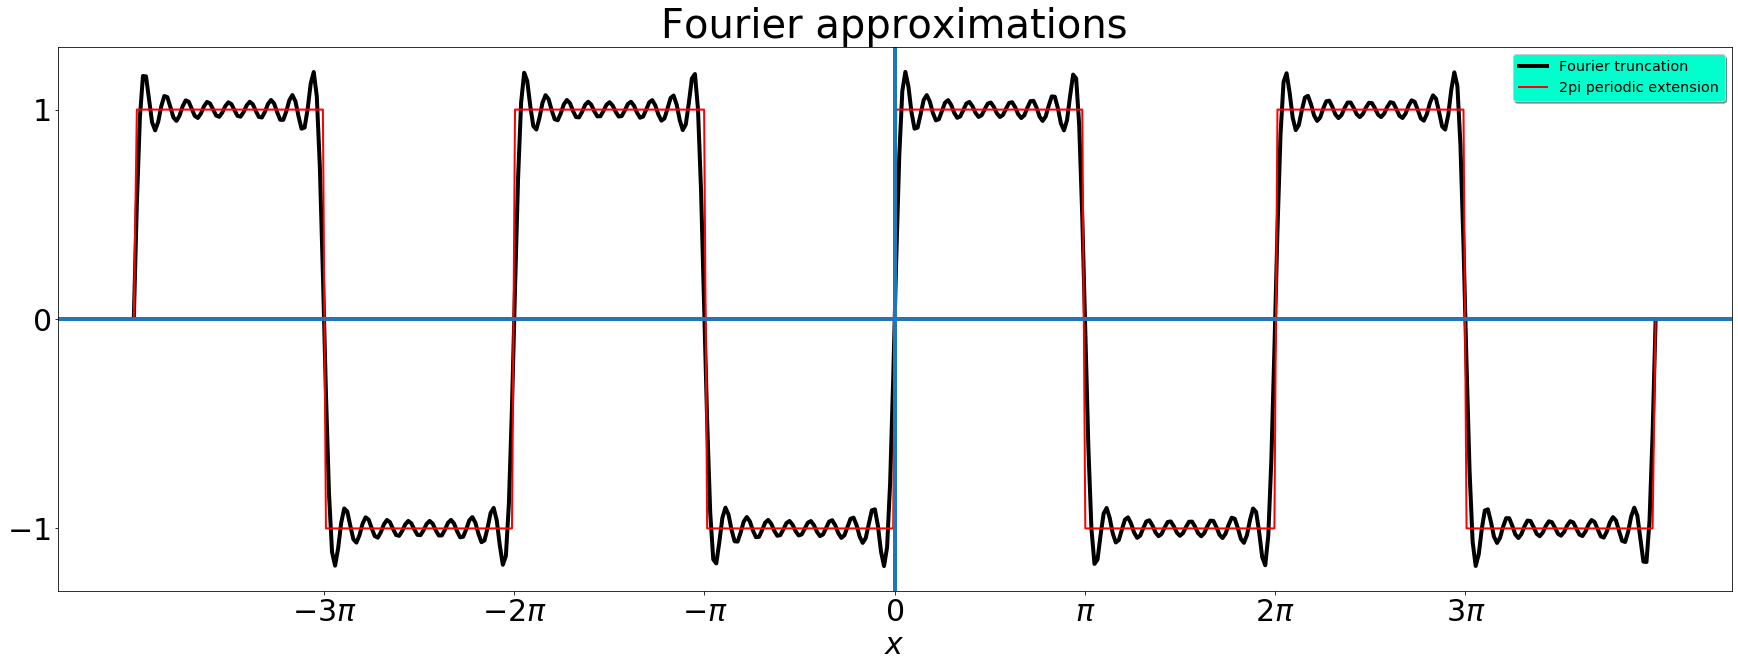

In [9]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(real,fs_sign, lw = 4, color="black", label='Fourier truncation')
ax.plot(real,sign, lw = 2, color="red", label='2pi periodic extension') 
ax.axhline(y =0, xmin = -4*pi, xmax= 4*pi, lw = 4)
ax.axvline(x =0, ymin = -1, ymax= 1, lw = 4)
plt.xticks([-3*pi,-2*pi, -pi, 0,pi , 2*pi, 3*pi],
           [r'$-3\pi$',r'$-2\pi$',r'$-\pi$',r'$0$', r'$\pi$',r'$2\pi$',r'$3\pi$' ],fontsize=30)
plt.yticks([-1, 0,1],
           [r'$-1$',r'$0$', r'$1$'  ],fontsize=30)
plt.xlabel(r'$x$', fontsize=30)
#plt.ylabel(r'x')
plt.title(r'Fourier approximations',fontsize=40)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.show()

Look at the discontinuities of the former graphs. Notice the overshoot of the Fourier approximations at the jump discontinuities of $2\pi$ periodic extension of the function to be approximate. The overshoots will not disappear by increasing the truncation term. See for example Wikipedia [Gibbs_phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon) 